# THE SPARKS FOUNDATION
## TASK 4 - Exploratory Data Analysis - Terrorism


### Name : Emna Fathalli

In [15]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('terrorism.csv',encoding='ISO-8859-1', low_memory=False)
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
data.shape

(181691, 135)

In [4]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [6]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)


In [7]:
new_data=data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]


In [8]:
new_data

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN


In [9]:
new_data.shape

(181691, 18)

In [10]:
#checking for null values
new_data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

### Data Exploration

<AxesSubplot:>

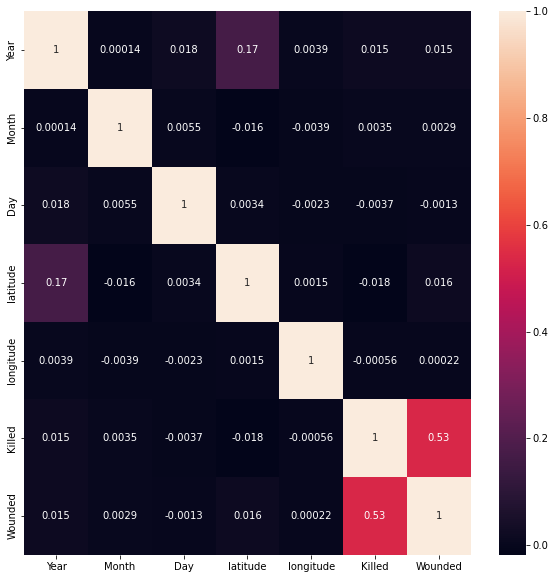

In [11]:
plt.figure(figsize=(10,10))
new_data.corr()
sns.heatmap(new_data.corr(), annot=True)

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'Killed'}>],
       [<AxesSubplot:title={'center':'Wounded'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 2880x1440 with 0 Axes>

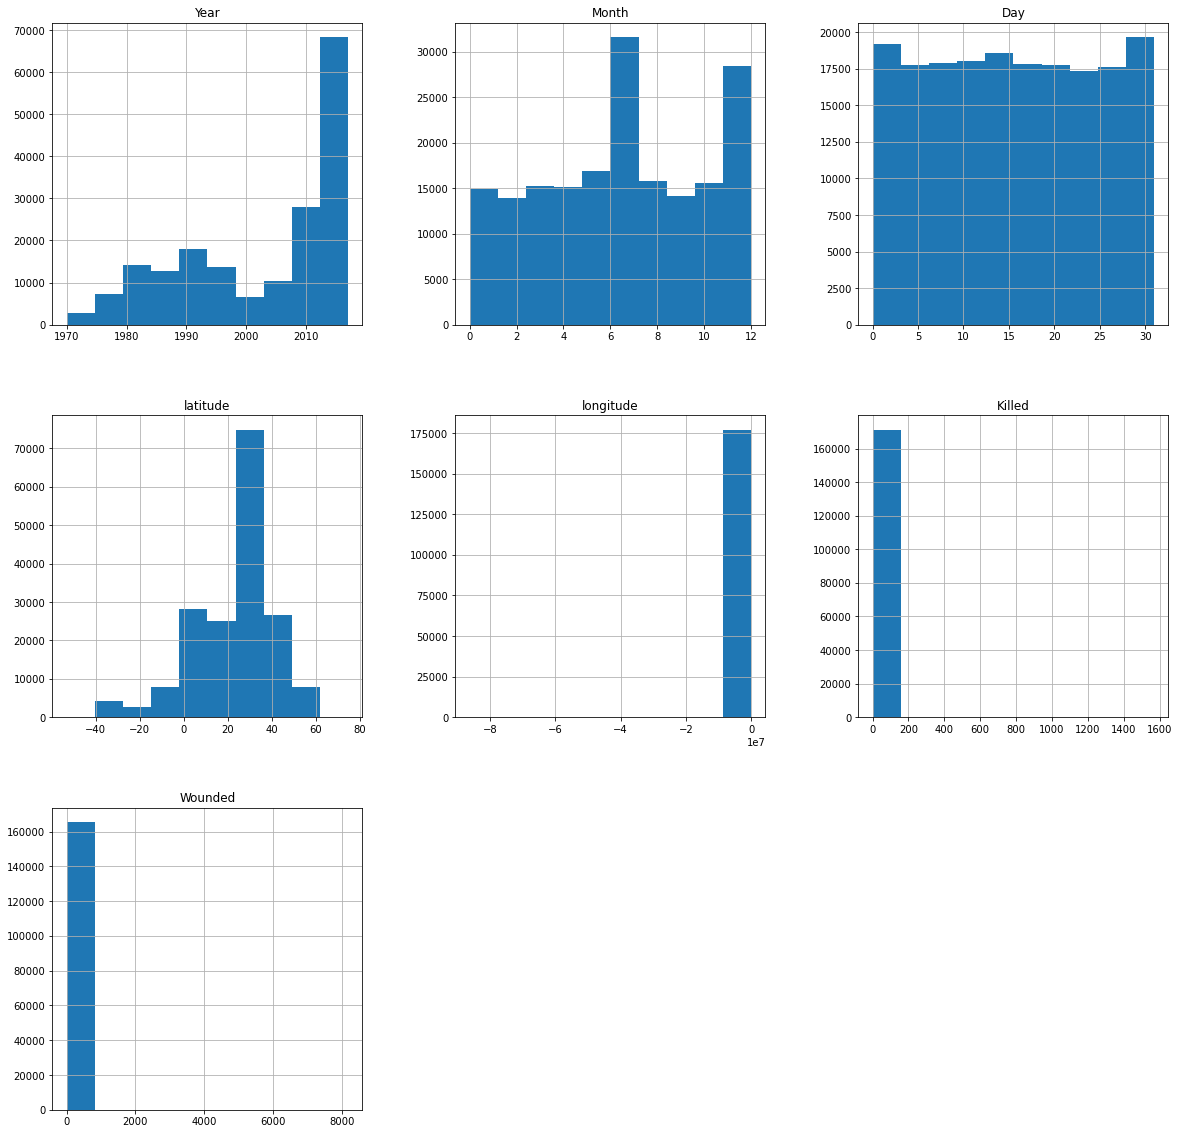

In [12]:
plt.figure(figsize=(40,20))
new_data.hist(figsize=(20,20))

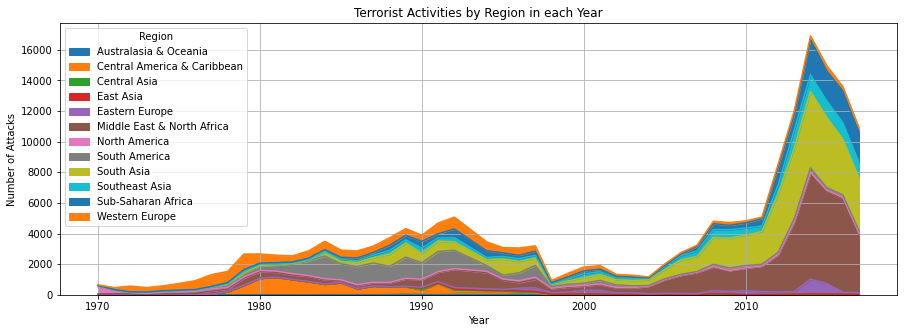

In [13]:
#Terrorist activities in each region through area plot
pd.crosstab(new_data.Year, new_data.Region).plot(kind='area',figsize=(15,5))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.grid()
plt.show()

South Asia, Australasia and Southeast asia have large number of terrorist activities.

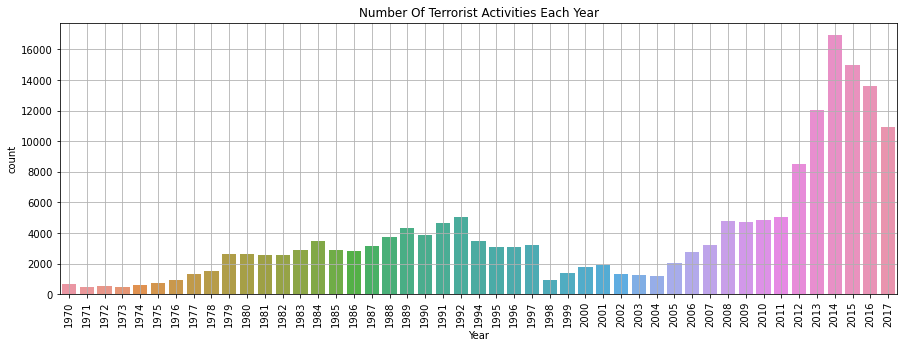

In [16]:
#Counting terrorist activities each year through countplot
plt.subplots(figsize=(15,5))
sns.countplot('Year',data = new_data)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.grid()
plt.show()

2014 and 2015 had large number of terrorist activities and its gradually increasing from 2004.


In [17]:
#Calculating the percentage of attacks that has happened since 1970 and 2017
Year=new_data.Year.value_counts().to_dict()
rate=((Year[2017]-Year[1970])/Year[2017])*100
print(Year[1970],'attacks happened in 1970 ')
print(Year[2017],'attacks happened in 2017')
print('Total number of attacks from 1970 has increased by',np.round(rate,0),'% till 2017')

651 attacks happened in 1970 
10900 attacks happened in 2017
Total number of attacks from 1970 has increased by 94.0 % till 2017


### Types of attack

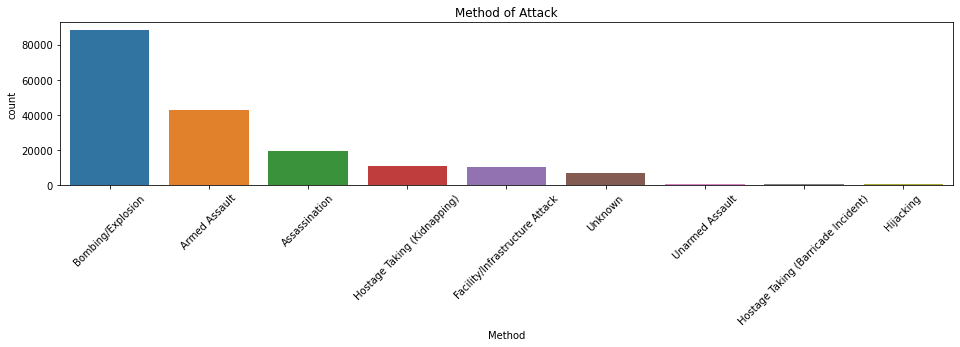

In [18]:
plt.figure(figsize=(16,3))
sns.countplot(x = new_data['AttackType'], order = new_data['AttackType'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

Bombing and Explosion attacks are mostly used by terrorist and hijacking is leastly used

### Different types of target

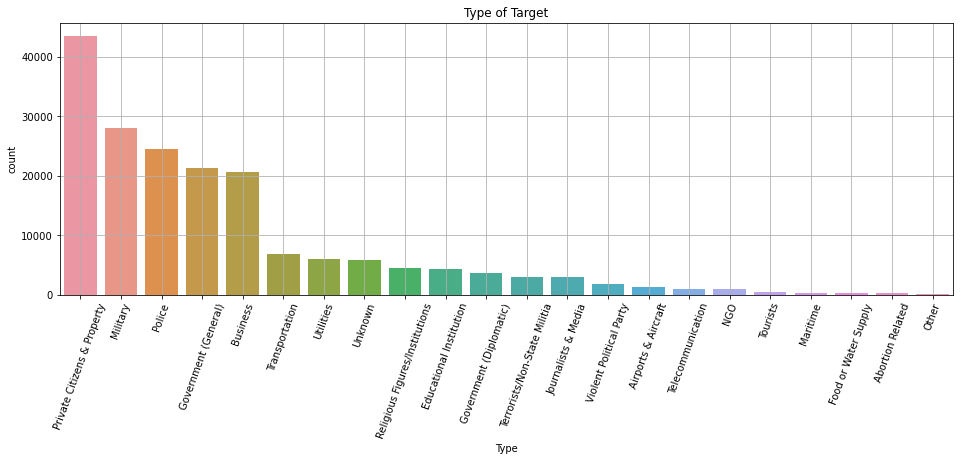

In [19]:
plt.figure(figsize=(16,5))
sns.countplot(x = new_data['Target_type'], order=new_data['Target_type'].value_counts().index)
plt.xticks(rotation=70)
plt.xlabel('Type')
plt.title('Type of Target')
plt.grid()
plt.show()

Private citizens and Property are targeted widely by terrorist when compared to other people

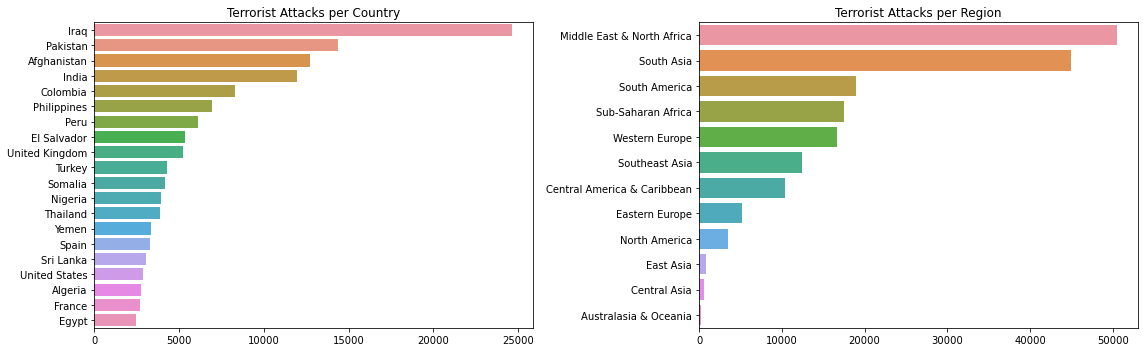

In [20]:
#Count of terrorist attacks in each country and regions
fig,axes = plt.subplots(figsize=(16,5),nrows=1,ncols=2)
sns.barplot(x = new_data['Country'].value_counts()[:20].values, y = new_data['Country'].value_counts()[:20].index, ax=axes[0]);
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=new_data['Region'].value_counts().values, y=new_data['Region'].value_counts().index, ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

Count of terrorist attacks is more in Iraq, Pakisthan and Afghanisthan and it is more in Middle east and north africa regions

### Count of attacks in each country using globe

In [21]:
df=new_data.groupby(['Country'],as_index=False).count()

### Country that suffered maximum and minimum attacks 

In [22]:
max_count=df['Year'].max()
max_id=df['Year'].idxmax()
max_name=df['Country'][max_id]
min_count=df['Year'].min()
min_id=df['Year'].idxmin()
min_name=df['Country'][min_id]

print(max_name,'has suffered the maximum number of terror attacks of',max_count)
print(min_name,'has suffered the minimum number of terror attacks of',min_count)

Iraq has suffered the maximum number of terror attacks of 24636
Andorra has suffered the minimum number of terror attacks of 1


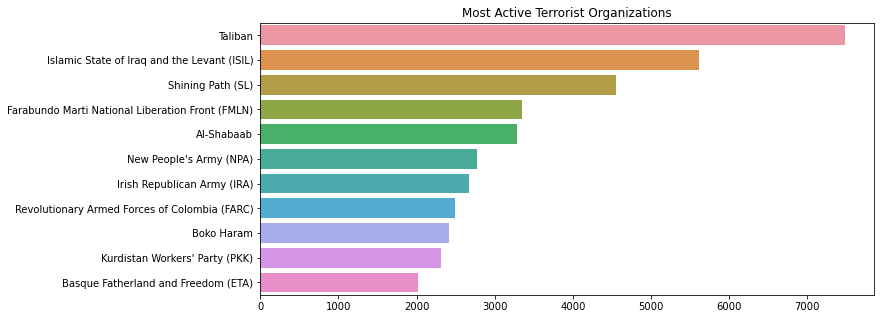

In [23]:
#Finding out the terrorist organizations that carried out the operations in different country
plt.subplots(figsize=(11,5))
sns.barplot(y=new_data['Group'].value_counts()[1:12].index,x=new_data['Group'].value_counts()[1:12].values)
plt.title('Most Active Terrorist Organizations')
plt.show()

## Analysing before and after war

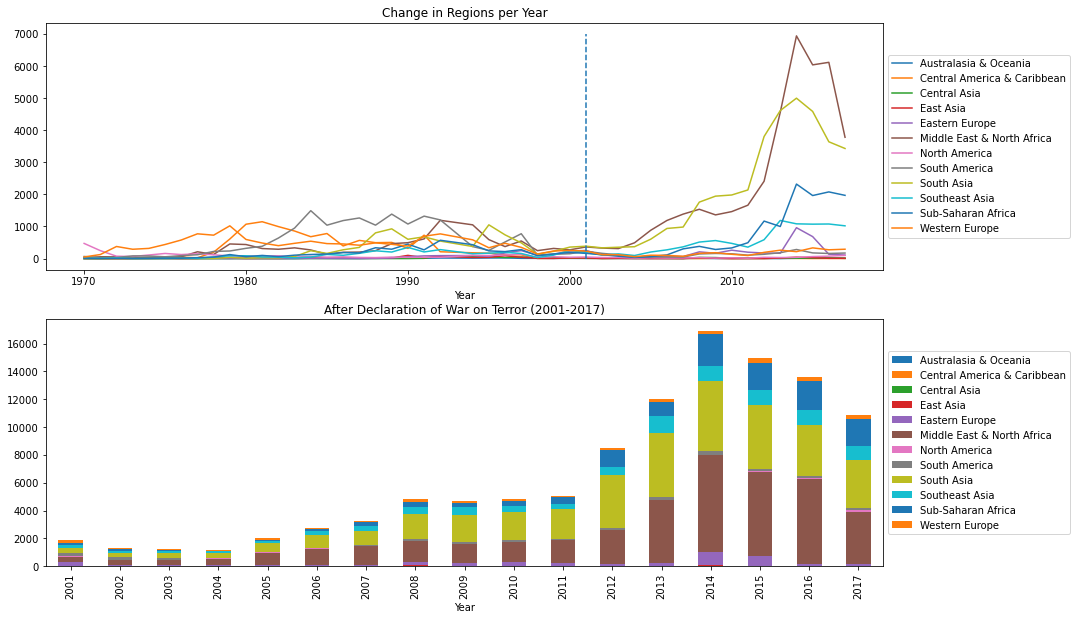

In [24]:
data_after = new_data[new_data['Year']>=2001]
fig,ax = plt.subplots(figsize=(15,10), nrows=2, ncols=1)
ax[0] = pd.crosstab(new_data.Year, new_data.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left', bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001, ymin=0, ymax=7000, linestyles='--')
pd.crosstab(data_after.Year,data_after.Region).plot.bar(stacked=True, ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left', bbox_to_anchor = (1,0.5))
plt.show()

In [25]:
print('Country with Highest Terrorist Attacks:',df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',df['Killed'].max(),'that took place in',df.loc[df['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Afghanistan
Regions with Highest Terrorist Attacks: 1
Maximum people killed in an attack are: 23911 that took place in Iraq


### Conclusion
- Terrorist activities are more in Middle East and North Africa which have increased from 2010.
- Terrorist Organizations have started using Airports And Aircraft and Military as their major target type since 2000's
- Iraq has suffered the maximum number of terror attacks and it's the most damaged country
- Andorra has suffered the minimum number of terror attacks
- South Asia, Australasia and Southeast asia have large number of terrorist activities
- Terrorist attacks in Middle East and North America have fatal consequences.
- Middle East and North Africa seen to have places of serious attacks.
- Muslims are attacked most by these attacks.